Name: Nguyễn Lâm Vĩnh Gia

# LOGISTIC REGRESSION

## 1. Standardization

For data with multiple attributes, standardization to scale the data around their mean is a important pre-processing step to avoid weighted effect on machine learning model.

In [93]:
import numpy as np
from sklearn.datasets import load_iris

# Function for standardization of data attributes
def standardization(X_train):
    for i in range(np.shape(X_train)[1]):
        X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])

# Function to initiate data system for matrix multiplication
def initialization(X_train):
    # Initiate the weight vector
    weight = np.zeros((np.shape(X_train)[1] + 1, 1))
    # Concatenate a column of 1 for matrix multiplication of X and weight vector + intercept
    X_train = np.c_[np.ones((np.shape(X_train)[0], 1)), X_train]
    return weight, X_train

# Load Iris data   
iris = load_iris()
iris_data = iris.data[:100]
iris_target = iris.target[:100]

print(iris_data[:10,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


## 2. Sigmoid function

Different from linear regression, logistic regression is used for classification of binary of multinomial classes. Thus, we need a function that can generate the result in the range between [0,1], which makes sigmoid or S-curve function an appropriate choice. 

$$ y = \frac{1}{1 + e^{-z}} $$
$$ z = B_{0} + B_{1}x_{1} + B_{2}x_{2} + ... + B_{n}x_{n} $$

In [94]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

## 3. Cost function

Instead of the MSE used in linear regression, the logistic use the cross entropy loss function to find the most suitable weighted factors and intercept of the model which fit the data the best. The idea of the cost function in Logistic Regression is that when a true prediction is made we will set that to 1 and 0 otherwise, which looks alike the Bernoulli distribution.

$$ L_{CE}(\hat{y},y) = - [ylog\sigma{(w.x + b)} + (1 - y)log(1 - \sigma{(w.x + b)})] $$

However, for optimization of computation, we will use the mini-batch training to faster convergence of the gradient descent algorithm for finding the weights and intercept. Thus, the cost function for mini-batch training is

$$ L_{CE}(\hat{y},y) = - \frac{1}{m}\sum^{m}_{i = 1}[y^{i}log\sigma{(w.x^{i} + b)} + (1 - y^{i})log(1 - \sigma{(w.x^{i} + b)})] $$

In [95]:
def cost(X,y,w):
    z = np.dot(X, w)
    cost0 = np.dot(y.T, np.log(sigmoid(z)))
    cost1 = np.dot((1 - y).T, np.log(1 - sigmoid(z)))
    cost = - (cost0 + cost1) / len(y)
    return cost

## 4. Gradient Descent

Gradient Descent is the optimization algorithm that is used to find the local minimum of the convex cost function (function which has only one local minimum). By taking the derivative of the cost function and iteratively calculate the slope of the current point value, the Gradient Descent will move closer and close to the actual local minimum, and the developer must decide the jump of each calculation, as well as the number of iteration for fastest convergence to the local minimum. The Gradient Descent equation of the mini-batch training Logistic Regression can be computed by taking the partial derivative of each weight and intercept

$$ \frac{dCost(\hat{y},y)}{dw} = \frac{1}{m}(\sigma{(w.x + b)} - y)^{T}X $$

In [96]:
def fit(X, y, alpha = 0.001, iter = 400):
    weight, X = initialization(X)
    cost_list = np.zeros(iter, 1)
    for i in range(iter):
        weight = weight - alpha * np.dot(X.T, sigmoid(np.dot(X, weight)) - np.reshape(y, ((len(y), 1))))
        cost_list[i] = cost(weight)
    return weight

## 5. Prediction

The prediction of Logistic Regression for binary case is very simple, in which 

$$ decision(x) = \begin{matrix}
1, P(y = 1|x) > 0.5 \\
0, otherwise
\end{matrix} $$

In [97]:
def predict(X_test, w):
    z = np.dot(initialization(X_test)[1], w)
    lis = list()
    for i in sigmoid(z):
        if i > 0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis

## 6. Object-oriented

Put all those code together into a class

In [98]:
class LogisticRegression():
    # Constructor
    def __init__(self) -> None:
        pass

    # Function to initiate the vectors
    def __initialization(self, X):
        # Initiate the weight vector
        weight = np.zeros((np.shape(X)[1] + 1, 1))
        # Concatenate a column of 1 for matrix multiplication of X and weight vector + intercept
        X = np.c_[np.ones((np.shape(X)[0], 1)), X]
        return weight, X
    
    # Function to calculate the sigmoid function
    def __sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    # Cost function
    def __cost(self, X, y, w):
        z = np.dot(X, w)
        cost0 = np.dot(y.T, np.log(self.__sigmoid(z)))
        cost1 = np.dot((1 - y).T, np.log(1 - self.__sigmoid(z)))
        cost = - (cost0 + cost1) / len(y)
        return cost

    # Funtion to perform Gradient Descent
    def fit(self, X, y, alpha = 0.001, iter = 400):
        weight, X = self.__initialization(X)
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weight = weight - alpha * np.dot(X.T, self.__sigmoid(np.dot(X, weight)) - np.reshape(y, ((len(y), 1))))
            cost_list[i] = self.__cost(X, y, weight)
        self.weights = weight
        return cost_list
    
    # Function for prediction
    def predict(self, X_test):
        z = np.dot(self.__initialization(X_test)[1], self.weights)
        lis = list()
        for i in self.__sigmoid(z):
            if i > 0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

The accuracy of the Logistic Regression: 1.0


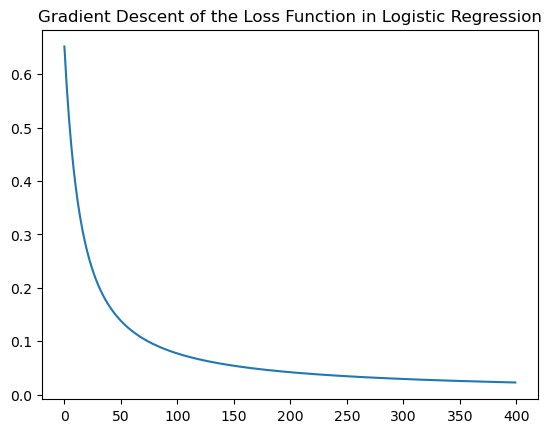

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, train_size=0.6)

standardization(X_train)
standardization(X_test)

log = LogisticRegression()
model = log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print("The accuracy of the Logistic Regression: {}".format(accuracy_score(y_pred, y_test)))
plt.plot(model)
plt.title("Gradient Descent of the Loss Function in Logistic Regression")
plt.show()